### PCA

In [12]:
# Import Library
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [13]:
# Set Config
CONFIG = {
    "data_dir": "./data_Zscore(ln(ln(max)))>-0.4519155544559894.csv"
    , "color": sns.diverging_palette(255, 10, l=50, s=100, n=40, center="dark")
    , "cbar": {"shrink": 0.8}
    , "max_threshold": -0.4519155544559894
    , "adopted_comp": 2
}

In [14]:
# Load Data
df = pd.read_csv(CONFIG['data_dir'], index_col=0)
df

,A1BG-AS1,A2M,A2M-AS1,A2ML1,A2MP1,A4GALT,AA06,AACSP1,AADAC,AADAC.1,...,ZSWIM6,ZSWIM8-AS1,ZWINT,ZWINT.1,ZXDA,ZXDC,ZXDC.1,ZYG11A,ZYX,ZZEF1
HCE-group1,0.966142,1.334170,1.701727,1.143557,1.419755,2.101355,1.382521,1.222376,1.536244,1.154999,...,1.058791,0.886258,0.012639,0.011378,1.326753,1.487131,0.768129,0.685911,0.723078,1.385136
HCE-group2,0.895675,0.435899,1.101959,1.240063,1.288893,0.906807,1.241442,0.607031,1.373055,1.045787,...,1.259343,2.935013,0.011165,0.009455,2.075996,1.160760,0.673543,0.615149,0.854355,1.644356
HCE-group3,0.835578,0.950616,1.526894,2.893388,1.514479,0.822678,1.457003,1.176685,1.614785,1.913634,...,1.749863,3.198322,0.014984,0.005773,2.166143,1.053459,0.520007,0.721815,0.931984,1.769639
iPS-1,0.616244,0.045829,0.710960,3.718910,1.001391,3.041766,1.021474,1.297939,1.005778,0.769199,...,0.588669,0.996625,0.906970,0.890340,1.343377,0.627733,1.597505,3.273970,1.244075,0.474302
iPS-2,0.612935,0.007708,0.819134,4.901699,0.998611,2.704741,1.672161,0.764695,1.015631,1.270889,...,0.656977,1.317069,0.984431,0.966673,1.127431,0.781935,1.876895,3.427181,1.063850,0.484983
iPS-3,0.498943,0.032557,1.038899,4.747103,0.867807,2.519607,0.874932,1.712152,0.875503,0.706077,...,0.503313,1.232360,0.896760,0.892327,0.463025,0.844544,2.180764,2.984722,1.021302,0.525226
CECSi -1,1.667225,8.366821,1.303082,0.627889,1.786787,0.552605,0.844468,0.703901,0.834011,1.359532,...,0.422956,0.426714,1.049316,1.091028,1.268874,1.686629,1.014412,2.146822,2.379174,1.054211
CECSi -2,1.619578,4.579539,1.564560,0.728686,0.955365,0.773664,0.954699,0.925682,0.981762,2.843432,...,0.384238,0.362890,1.306203,1.175367,1.378862,2.016147,0.853374,1.213499,2.421958,1.163564
CECSi -3,1.611442,3.763584,1.710465,1.173966,0.906775,0.824606,0.909324,0.902398,0.943862,1.071924,...,0.471079,0.413762,1.095128,1.124049,1.328803,2.247507,0.922812,1.176043,2.543450,1.145989
NCC-1,0.676305,1.015680,1.098091,0.943288,0.967922,0.442211,0.978977,0.799652,2.086308,1.658386,...,1.032733,1.143160,1.695820,1.874190,2.818332,1.026403,1.641077,0.624319,0.827935,1.202614


In [15]:
# PCA
model = PCA(random_state=0)
model.fit(df)
Rdata = pd.DataFrame(model.transform(df), index=df.index, columns=[f"PCA{i}"for i in range(1, min(len(df), len(df.T))+1)])

In [16]:
# Contribution
temp = [
[f"{i:.2f}" for i in (model.explained_variance_ratio_ * 100)]
, [f"{i:.2f}" for i in (model.explained_variance_ratio_.cumsum() * 100)]
]

cont = pd.DataFrame(temp
            , index=['contribution [%]', 'cumulative contribution [%]']
            , columns=[f"PC_{i}" for i in range(1, min(len(df), len(df.T))+1)]
).T
cont.to_csv(f"contribution_threshold={CONFIG['max_threshold']}).csv", index=True)
cont

,contribution [%],cumulative contribution [%]
PC_1,97.72,97.72
PC_2,1.00,98.72
PC_3,0.72,99.44
PC_4,0.27,99.71
PC_5,0.25,99.96
PC_6,0.03,99.99
PC_7,0.01,100.00
PC_8,0.00,100.00
PC_9,0.00,100.00
PC_10,0.00,100.00


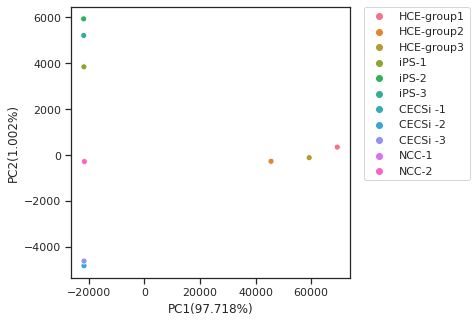

In [17]:
# Plot
sns.set() 
sns.set_style('ticks')
fig, ax = plt.subplots(figsize = (5,5))
[pc1, pc2] = model.explained_variance_ratio_[0:2]
PC1 = round(100*pc1, 3)
PC2 = round(100*pc2, 3)
sns.scatterplot(x="PCA1", y="PCA2", data=Rdata, hue=Rdata.index)
ax.set(xlabel=f"PC1({PC1}%)",ylabel=f"PC2({PC2}%)")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig(f"contribution_threshold={CONFIG['max_threshold']}.png", facecolor="white", dpi=300, bbox_inches="tight", pad_inches=0.05)